# **Episode Recommendation using Cosine Similarity - The Office TV Series**

A content based recommendation system based on the episode's description.

What is a content based recommendation system?
> A content based recommender works with data that the user provides, either explicitly (rating) or implicitly (clicking on a link). Based on that data, a user profile is generated, which is then used to make suggestions to the user. As the user provides more inputs or takes actions on the recommendations, the engine becomes more and more accurate.

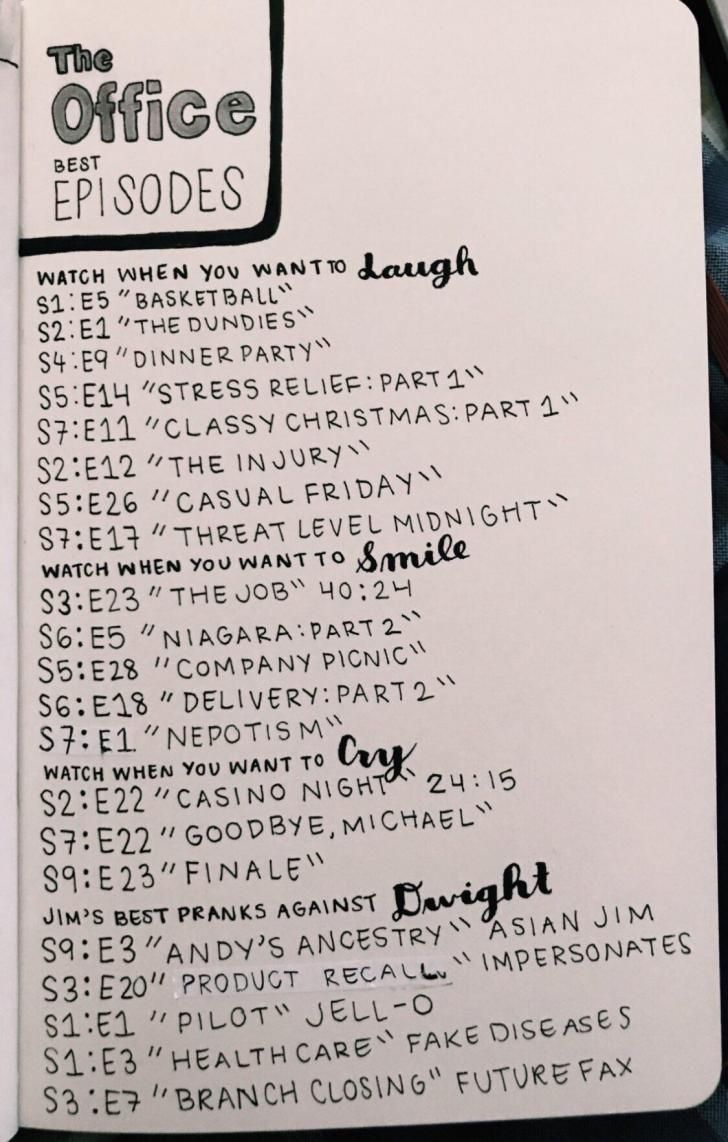

importing libraries

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

reading the dataset and selecting required columns

In [ ]:
data = pd.read_csv('../input/the-office-dataset/the_office_series.csv')
df = data[['EpisodeTitle','About']]

assigning unique index to each episode

In [ ]:
df['Index'] = np.arange(0,188)

what our data looks like

In [ ]:
df.head()

creating stop words list and stemmer

In [ ]:
stop_words = stopwords.words('english')
stemmer = PorterStemmer()

removing punctuations, numbers, etc and converting into lower case

In [ ]:
summary = []
for i in range(0,len(df)):
    about = re.sub('[^a-zA-Z]', ' ', df['About'][i])
    about = about.lower()
    about = about.split()
    about = [stemmer.stem(word) for word in about if not word in stop_words]
    about = ' '.join(about)
    summary.append(about)

In [ ]:
summary

# **Cosine Similarity**

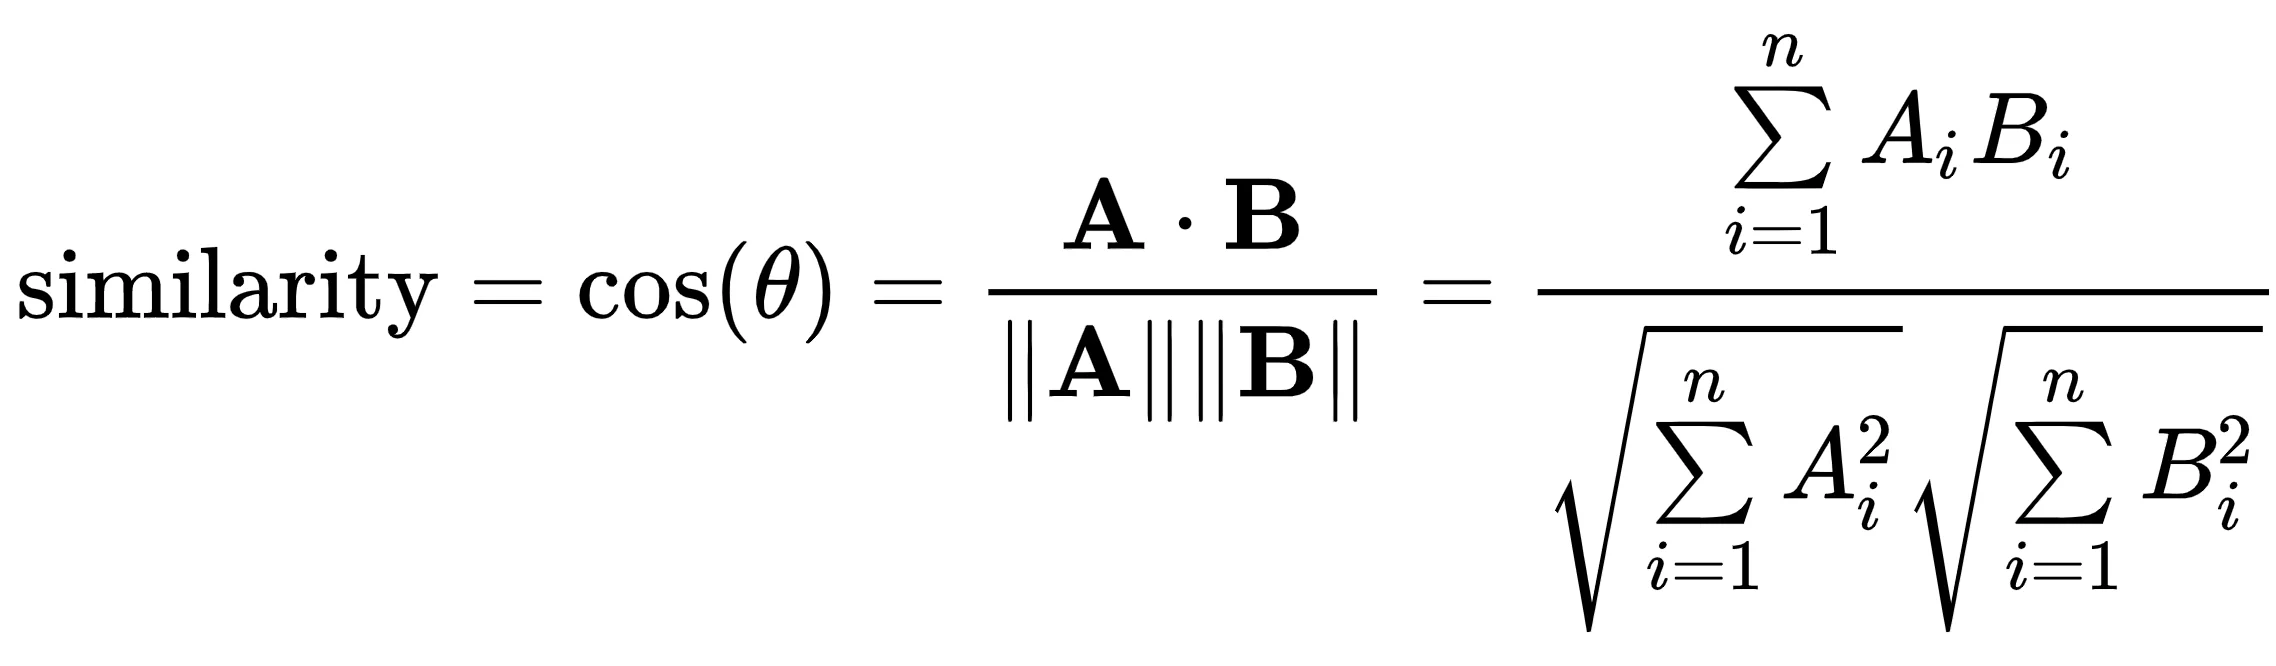

converting text into tf-idf matrix and then into cosine similarity matrix

In [ ]:
tf = TfidfVectorizer()
X = tf.fit_transform(summary)
cos_sim = cosine_similarity(X, X)

cosine similarity of all 188 episodes with each other

In [ ]:
cos_sim.shape

cosine similarity dataframe

In [ ]:
cos_sim_df = pd.DataFrame(data=cos_sim,columns=df.EpisodeTitle)
cos_sim_df.head()

function to recommend top 3 episodes based on maximum cosine similarity

In [ ]:
def show_recommendation(episode_name):
    for i in range(0,len(df)):
        if df.values[i][0] == episode_name:
            episode_index = df.values[i][2]
            sorted_data = cos_sim_df.iloc[episode_index].sort_values(ascending=False)
            sorted_df = pd.DataFrame(sorted_data)
            print(sorted_df.index[1:4],sorted_df.iloc[1:4])

recommend top 3 episodes similar to episode titled 'Basketball'

In [ ]:
show_recommendation('Basketball')